In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from functions import *

In [9]:
'''Import Data'''
mefdaily = pd.read_csv('./mef-data/daily/S2_Master.csv', index_col = 0, 
                      parse_dates = ['Date'])

#Sort seasons appropriately
#storage_it = mefSeasonal.sort_values(['YEAR', 'Season'], ascending=[True, False]).reset_index(drop = True)
#storage_it.head()

In [11]:
mefdaily.columns

Index(['Date', 'Precip', 'DOY', 'YEAR', 'Watershed_x', 'Flow_Ls', 'Flow_cfs',
       'Flow_cmday', 'MEF_SnowDepth_cm', 'Max_Temp_F', 'Min_Temp_F',
       'Precip_in', 'Snow_in', 'DNR_SnowDepth_in', 'Watershed_y', 'WTE',
       'Flag', 'Peatland', 'DepthtoFrost', 'FrostThickness', 'FrostPerc',
       'DNR_SnowDepth_cm', 'FrostThickness_cm', 'DOWY', 'WYEAR'],
      dtype='object')

In [28]:
#Pull out columns of interest
storage_daily = mefdaily[['Date', 'Precip', 'Flow_cmday', 'Precip_in', 'Snow_in', 'DNR_SnowDepth_cm', 'WTE']]

In [29]:
storage_daily.describe()

,Precip,Flow_cmday,Precip_in,Snow_in,DNR_SnowDepth_cm,WTE
count,9130.000000,8095.000000,8472.000000,8704.000000,8711.000000,9477.000000
mean,0.218927,0.043973,0.087180,0.173323,9.289909,421.896724
std,0.623559,0.152998,0.247994,0.741551,16.491872,0.103098
min,0.000000,0.000000,0.000000,0.000000,0.000000,421.420000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,421.860000
50%,0.000000,0.000530,0.000000,0.000000,0.000000,421.920000
75%,0.130000,0.023160,0.040000,0.000000,12.700000,421.960000
max,18.670000,6.546800,4.780000,17.000000,91.440000,422.270000


In [30]:
storage_daily = storage_daily.dropna(how = 'any')

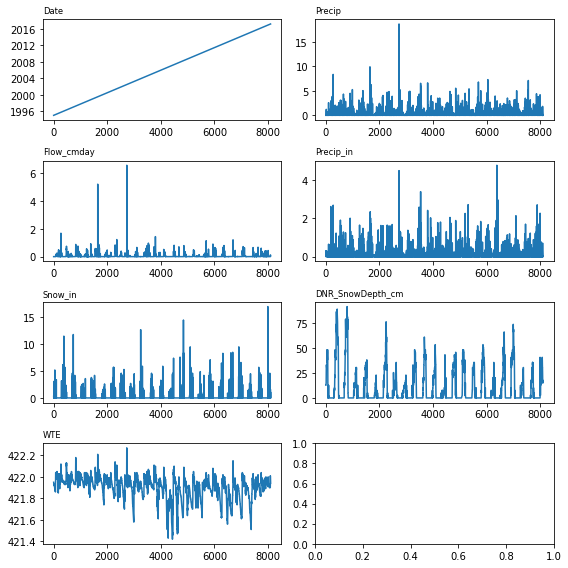

In [31]:
'''Timeseries plots'''
fig, axs = plt.subplots(4, 2, figsize = (8, 8), 
                    layout = 'tight')

for i in range(0, 7):
    ax = axs.ravel()[i]
    ax.plot(storage_daily.iloc[:, i])
    ax.set_title(storage_daily.columns[i], size = 'small', loc = 'left')

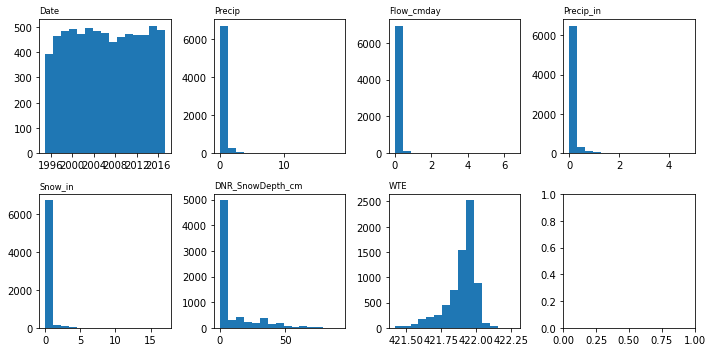

In [32]:
'''Distribution plots'''
fig, axs = plt.subplots(2, 4, figsize = (10, 5), 
                    layout = 'tight')

for i in range(0, 7):
    ax = axs.ravel()[i]
    ax.hist(x = storage_daily.iloc[:, i], bins = 15)
    ax.set_title(storage_daily.columns[i], size = 'small', loc = 'left')

In [33]:
def plot_te(x, y, lags, title, ax):
    t = []

    for l in lags:
        a = te(x, y, lag = l)
        t.append(a)

    sns.lineplot(x = lags, y = t, ax = ax)

    ax.set_xlim(min(lags), max(lags))
    ax.set_xlabel('Delay, days')
    ax.set_ylabel('Transfer Entropy')
    
    
def plot_tetest(x, y, lags, title, ax):
    t = []
    tz = []
    sig = []

    for l in lags:
        a, b, c = te_test(x, y, lag = l)
        t.append(a)
        tz.append(b)
        sig.append(c)

    sns.lineplot(x = lags, y = t, label = 'TE', ax = ax)
    sns.lineplot(x = lags, y = tz, linestyle = '--', label = r'$TE_z$', ax = ax)

    ax.legend(bbox_to_anchor = (1, 1))
    ax.set_xlim(min(lags), max(lags))
    ax.set_xlabel('Delay, seasons')
    ax.set_ylabel('Transfer Entropy')
    ax.set_title(title, size = 'small', loc = 'left')

In [34]:
#go back 5 years
lags = range(1, 90)

/panfs/jay/groups/8/feng/jone3247/process-networks/functions.py:51: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  shiftedX = list(x[: len(x) - lag])
/panfs/jay/groups/8/feng/jone3247/process-networks/functions.py:53: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  shiftedY = list(y[lag - 1 : len(x) - 1])
/panfs/jay/groups/8/feng/jone3247/process-networks/functions.py:55: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, thi

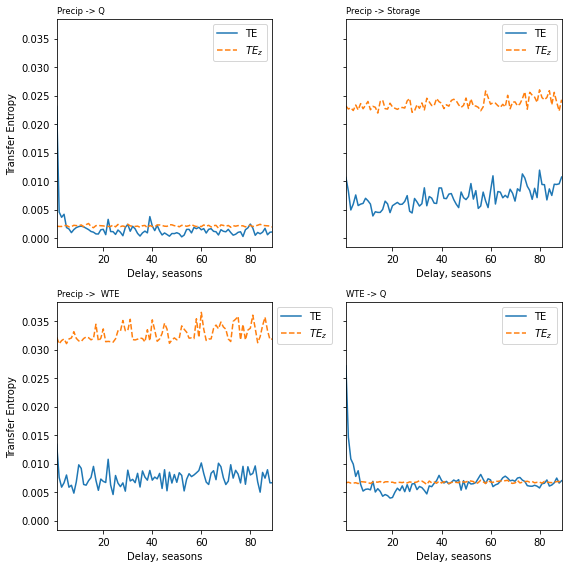

In [35]:
#Make plots
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize = (8, 8), 
                                                       layout = 'tight', 
                                                       sharey = True)

plot_tetest(storage_daily.Precip, storage_daily.Flow_cmday, lags, r'Precip -> Q', ax = ax1)
plot_tetest(storage_daily.Precip, storage_daily.DNR_SnowDepth_cm, lags, r'Precip -> Storage', ax = ax2)

plot_tetest(storage_daily.Precip, storage_daily.WTE, lags, r'Precip ->  WTE', ax = ax3)
plot_tetest(storage_daily.WTE, storage_daily.Flow_cmday, lags, r'WTE -> Q', ax = ax4)